## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [26]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

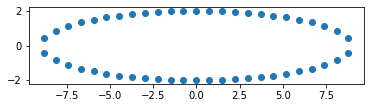

In [27]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [18]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

In [62]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef*mi - intercept)/coef), mi],[((-coef*ma - intercept)/coef), ma]])
#     return(points[0],points[1])
    col.plot(points[:,0], points[:,1])

In [69]:
def draw_line1(coef,intercept, mi, ma):
    
    points = np.array([[(coef*mi + intercept),mi],[(coef*mi + intercept),ma]])
    col.plot(points[:,0], points[:,1])

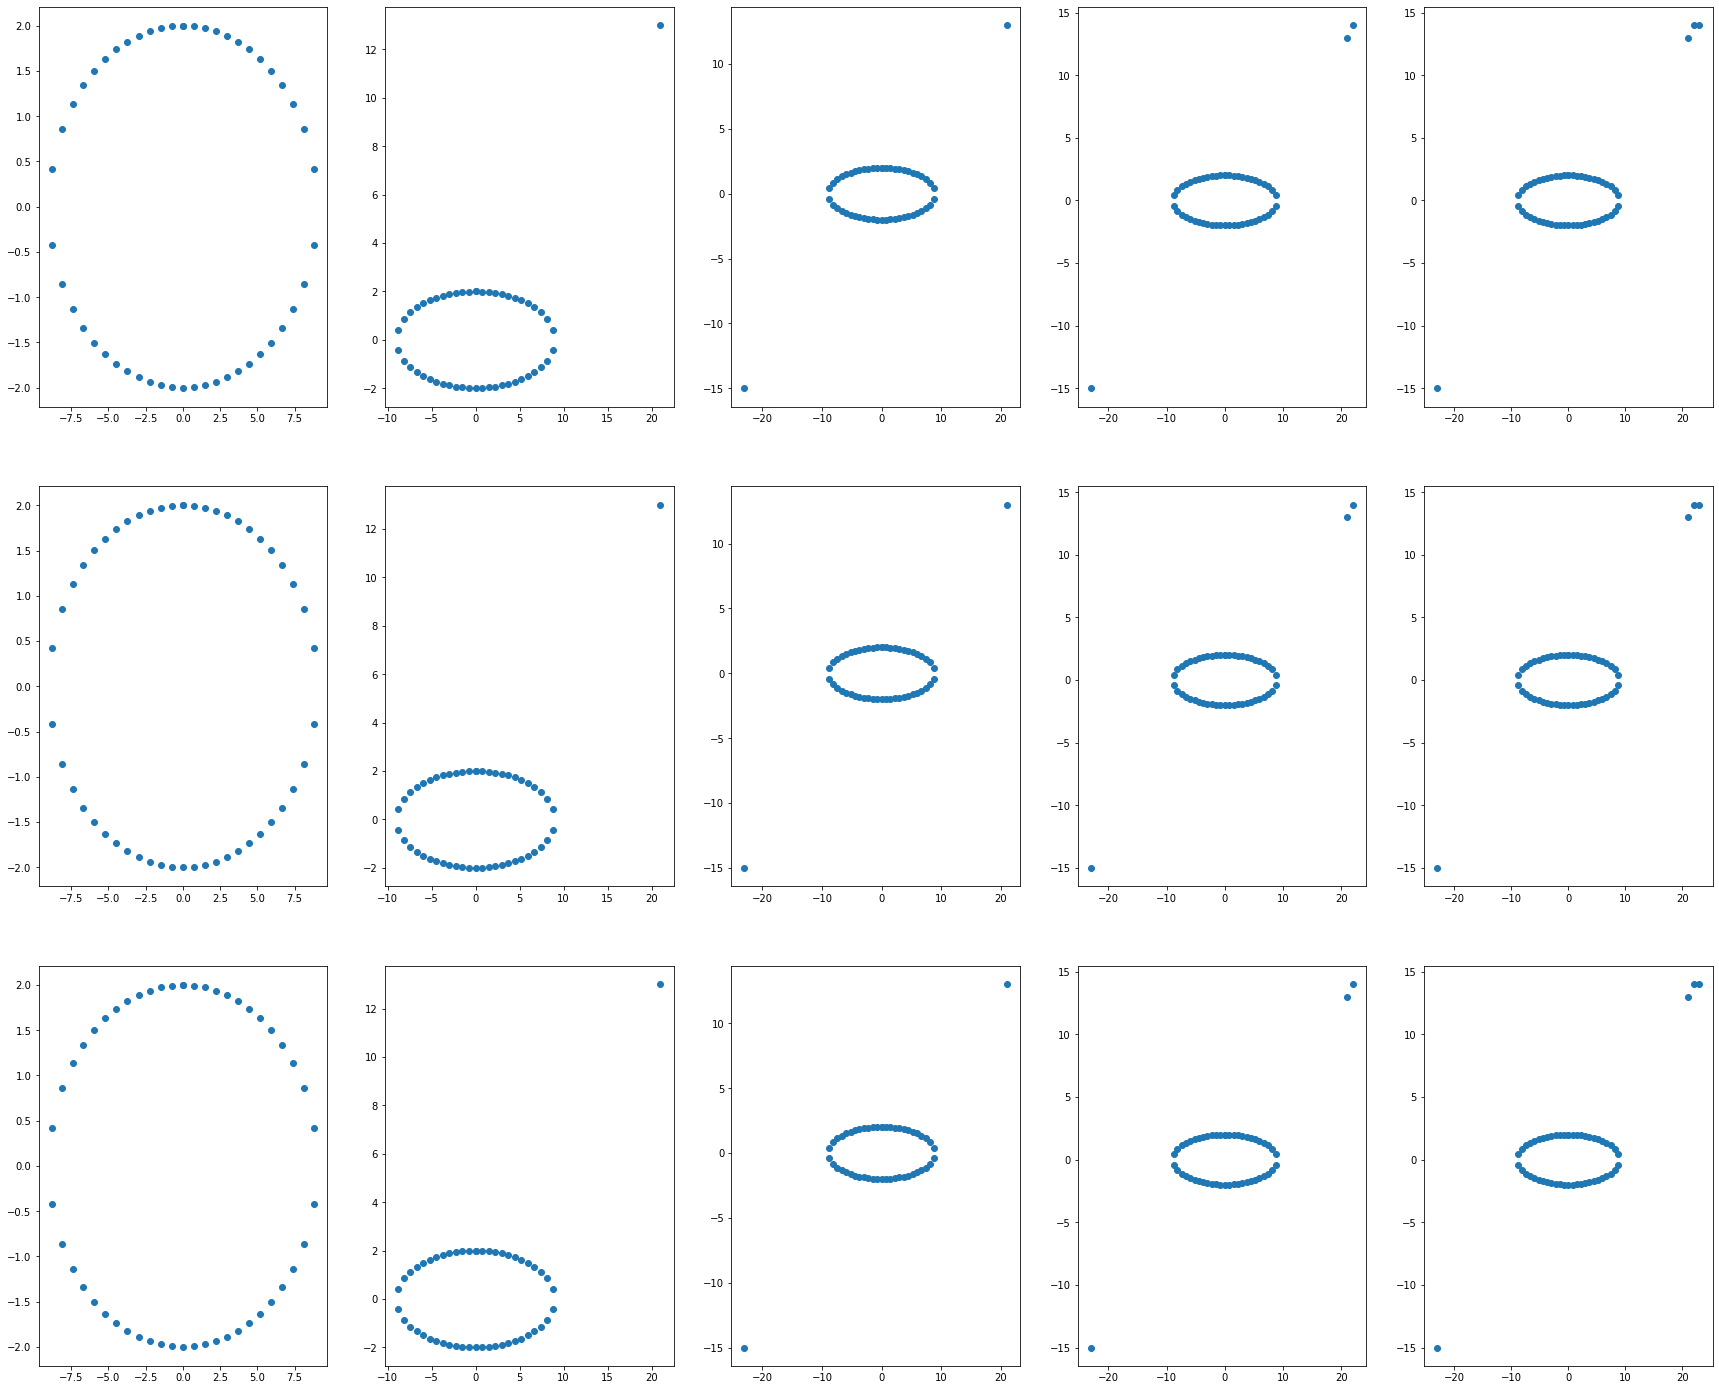

In [75]:
#you can start writing code here.

import matplotlib.pyplot as plt
# SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)
outlier = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
learning_rate = [0.0001, 1, 100] 
fig, ax = plt.subplots(nrows=3,ncols=5,figsize=(30,25))
for i,row in enumerate(ax):
    X= b * np.sin(phi)
    Y= a * np.cos(phi)
    for j,col in enumerate(row):
        X,Y = np.append(X,outlier[j][0]),np.append(Y,outlier[j][1])
        reg = SGDRegressor(alpha=0.001, eta0=learning_rate[i], learning_rate='constant',random_state=0)
        reg.fit(X.reshape(-1,1),Y)
#         draw_line1(reg.coef_[0],reg.intercept_[0],min(X),max(X))
        col.scatter(X,Y,label="Positive Points")
#       col.scatter(y,c='red',label="Negative points")
        
plt.show()


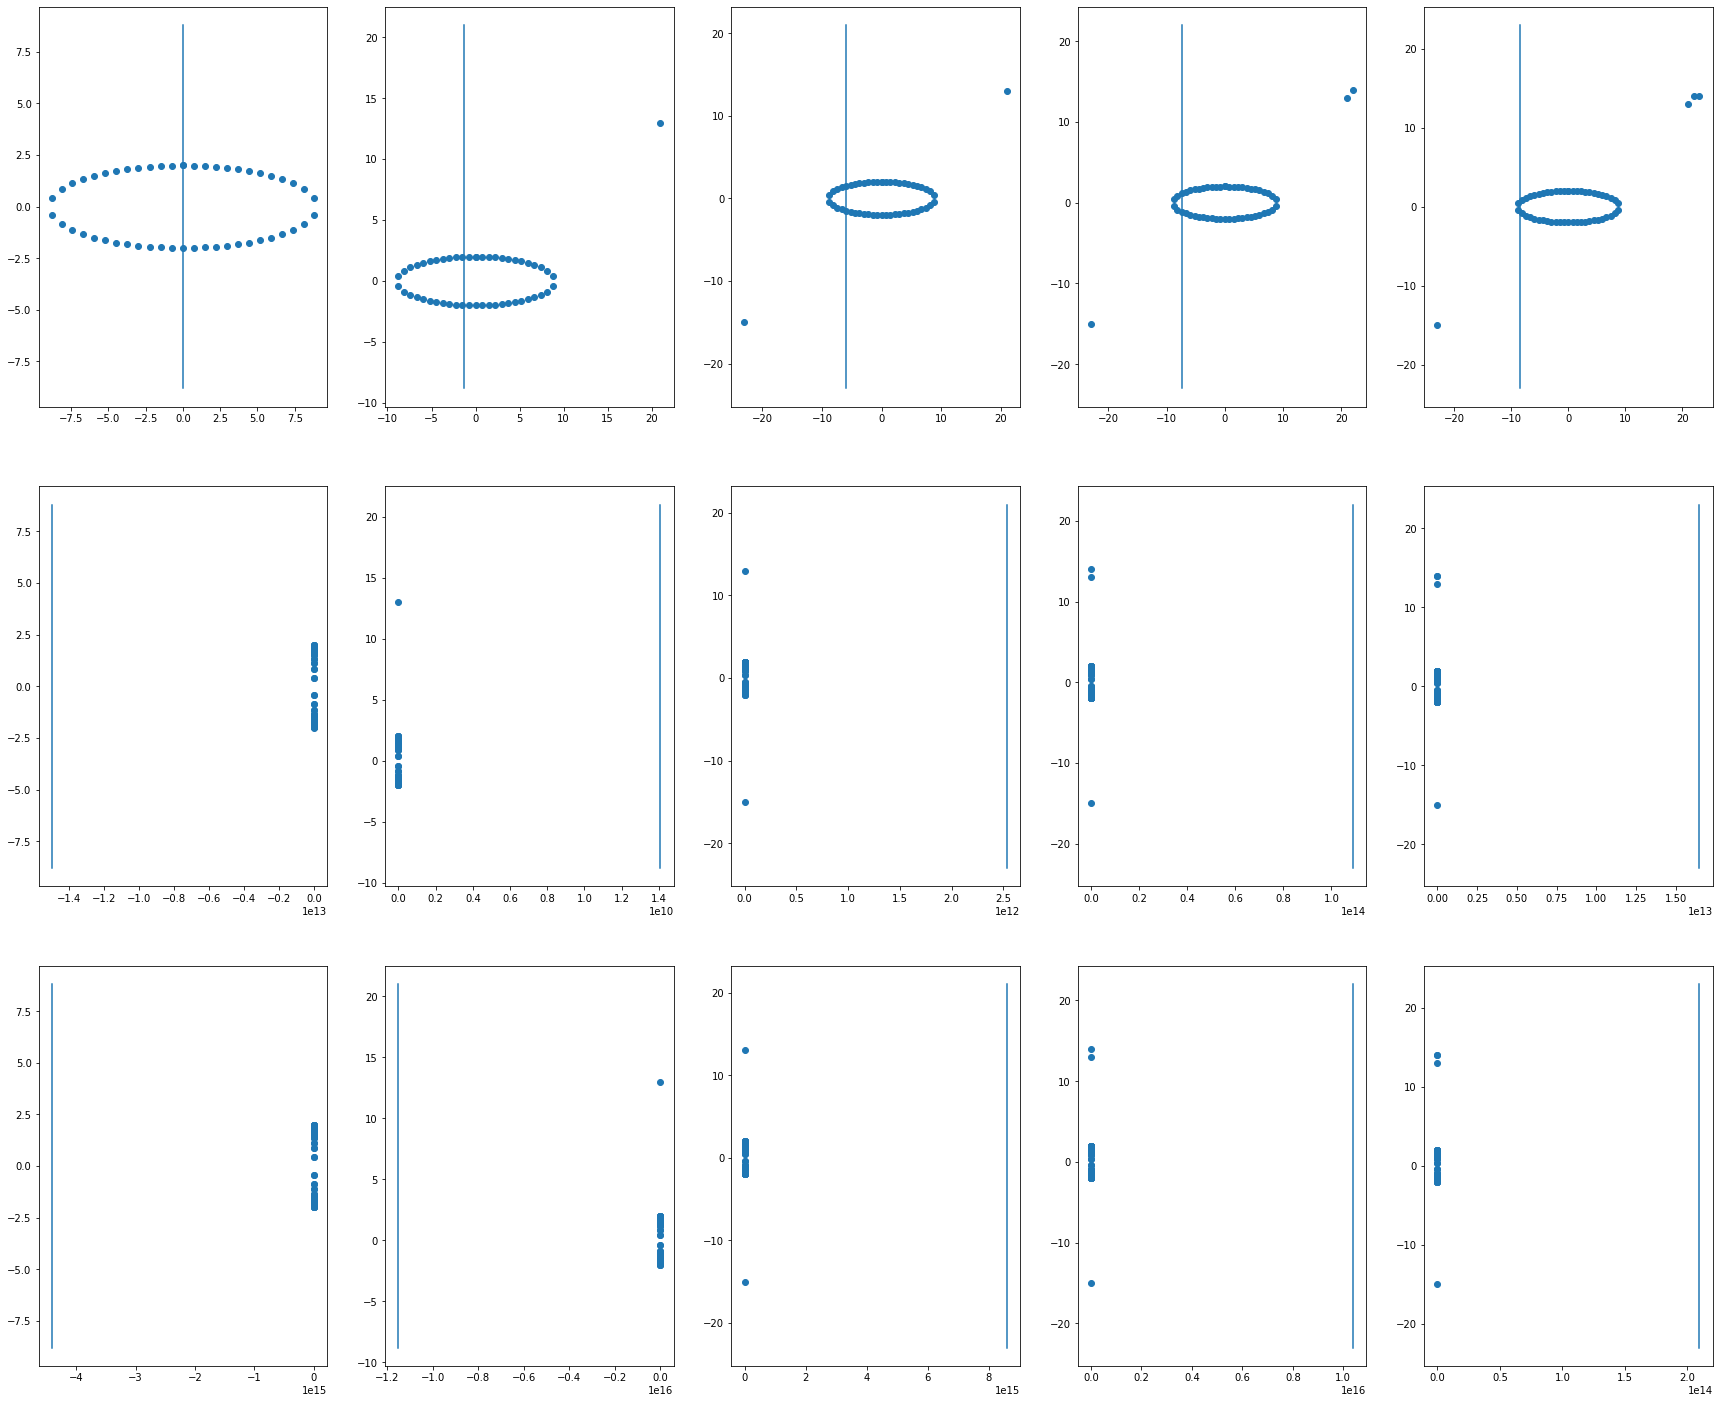

In [73]:
#you can start writing code here.

import matplotlib.pyplot as plt
# SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)
outlier = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
learning_rate = [0.0001, 1, 100] 
fig, ax = plt.subplots(nrows=3,ncols=5,figsize=(30,25))
for i,row in enumerate(ax):
    X= b * np.sin(phi)
    Y= a * np.cos(phi)
    for j,col in enumerate(row):
        X,Y = np.append(X,outlier[j][0]),np.append(Y,outlier[j][1])
        reg = SGDRegressor(alpha=0.001, eta0=learning_rate[i], learning_rate='constant',random_state=0)
        reg.fit(X.reshape(-1,1),Y)
        draw_line1(reg.coef_[0],reg.intercept_[0],min(X),max(X))
        col.scatter(X,Y,label="Positive Points")
#       col.scatter(y,c='red',label="Negative points")
        
plt.show()


In [52]:
reg = SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)
reg.fit(X.reshape(-1,1),Y)
print(dir(reg))
# X.reshape(-1,1)

['C', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_allocate_parameter_mem', '_decision_function', '_estimator_type', '_fit', '_fit_regressor', '_get_learning_rate_type', '_get_loss_function', '_get_param_names', '_get_penalty_type', '_get_tags', '_make_validation_score_cb', '_make_validation_split', '_partial_fit', '_validate_params', '_validate_sample_weight', 'alpha', 'average', 'coef_', 'densify', 'early_stopping', 'epsilon', 'eta0', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'l1_ratio', 'learning_rate', 'loss', 'loss_functions', 'max_iter', 'n_iter_', 'n_iter_no_change', 'partial_fit', 'penalty', 'power_t', 'pr

In [60]:
reg.intercept_[0],reg.coef_[0],min(X),max(X)

(0.09008739748418314, 0.504008554677971, -23.0, 23.0)

In [59]:
min()

array([ 0.00000000e+00,  7.44742410e-01,  1.48935470e+00,  2.23369584e+00,
        2.97760060e+00,  3.72086049e+00,  4.46319267e+00,  5.20418351e+00,
        5.94317435e+00,  6.67899598e+00,  7.40922283e+00,  8.12729576e+00,
        8.80003723e+00,  8.80003723e+00,  8.12729576e+00,  7.40922283e+00,
        6.67899598e+00,  5.94317435e+00,  5.20418351e+00,  4.46319267e+00,
        3.72086049e+00,  2.97760060e+00,  2.23369584e+00,  1.48935470e+00,
        7.44742410e-01,  1.10218212e-15, -7.44742410e-01, -1.48935470e+00,
       -2.23369584e+00, -2.97760060e+00, -3.72086049e+00, -4.46319267e+00,
       -5.20418351e+00, -5.94317435e+00, -6.67899598e+00, -7.40922283e+00,
       -8.12729576e+00, -8.80003723e+00, -8.80003723e+00, -8.12729576e+00,
       -7.40922283e+00, -6.67899598e+00, -5.94317435e+00, -5.20418351e+00,
       -4.46319267e+00, -3.72086049e+00, -2.97760060e+00, -2.23369584e+00,
       -1.48935470e+00, -7.44742410e-01,  0.00000000e+00,  2.10000000e+01,
       -2.30000000e+01,  